In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import catboost

In [2]:
data = pd.read_csv('D:/DS_Case_Study_beer-ratings_2020/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [3]:
data.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pats Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellies Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


# DATA CLEANING AND PREPROCESSING

In [4]:
data.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

In [5]:
#Dropping columns with mostly missing values and with unique IDs
data = data.drop(['user/ageInSeconds','user/birthdayRaw','user/birthdayUnix','user/gender','user/profileName',
                  'review/timeUnix','index','beer/beerId','beer/brewerId','review/timeStruct'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beer/ABV           37500 non-null  float64
 1   beer/name          37500 non-null  object 
 2   beer/style         37500 non-null  object 
 3   review/appearance  37500 non-null  float64
 4   review/aroma       37500 non-null  float64
 5   review/overall     37500 non-null  float64
 6   review/palate      37500 non-null  float64
 7   review/taste       37500 non-null  float64
 8   review/text        37490 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.6+ MB


In [6]:
data.isnull().sum()

beer/ABV              0
beer/name             0
beer/style            0
review/appearance     0
review/aroma          0
review/overall        0
review/palate         0
review/taste          0
review/text          10
dtype: int64

In [7]:
#Removing the 10 rows with no reviews
data = data[data['review/text'].notna()]
data = data.drop(['review/text'],axis=1)
data = pd.DataFrame(data)
data = data.reset_index(drop=True)

In [8]:
data

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste
0,5.00,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0
1,11.00,Bearded Pats Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0
2,4.70,Naughty Nellies Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5
3,4.40,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0
4,4.40,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5
...,...,...,...,...,...,...,...,...
37485,5.50,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5
37486,8.50,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5
37487,4.75,Stoudts Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0
37488,11.20,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0


In [9]:
# Extracting sentiment as positive, nagetive and neutral from text reviews
sentiment = pd.read_csv("D:/DS_Case_Study_beer-ratings_2020/sentiment.csv")
sentiment = sentiment['Sentiment']
sentiment = pd.DataFrame(sentiment)
sentiment

,Sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
37485,Positive
37486,Positive
37487,Positive
37488,Positive


In [10]:
data['sentiment'] = sentiment
data

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,sentiment
0,5.00,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Positive
1,11.00,Bearded Pats Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,Positive
2,4.70,Naughty Nellies Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,Positive
3,4.40,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,Positive
4,4.40,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,Positive
...,...,...,...,...,...,...,...,...,...
37485,5.50,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,Positive
37486,8.50,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,Positive
37487,4.75,Stoudts Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Positive
37488,11.20,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Positive


Taking beer/ABV, beer/name, beer/style, review/appearance, review/aroma, review/overall, review/palate, review/taste and sentiment as predictors and review/overall score as target variable

In [11]:
predictors = data.drop(['review/overall'],axis=1)
target = data['review/overall']

In [12]:
#Seperating categorical and numeric predictors
categoricalCols = [col for col in predictors.columns if predictors[col].dtype=='object']
predictorsCategorical = predictors[categoricalCols]

numericCols = predictors.columns.difference(categoricalCols)
predictorsNumerical = predictors[numericCols]

In [13]:
categoricalCols = [col for col in data.columns if data[col].dtype=='object']
for i in categoricalCols:
    print(str(data[i].value_counts()))
    print()

Founders Breakfast Stout                   1883
Founders KBS (Kentucky Breakfast Stout)    1439
Founders Centennial IPA                    1063
Founders Reds Rye PA                       1051
Founders Dirty Bastard                      983
                                           ... 
SchorschbrÃ¤u Schorschbock 31%                1
Breznak Bernstein                             1
Alley Way Amber                               1
Belgian Double                                1
SchorschbrÃ¤u Schorschbock 40%                1
Name: beer/name, Length: 1688, dtype: int64

American Double / Imperial Stout    4493
American IPA                        3048
American Double / Imperial IPA      2871
Scotch Ale / Wee Heavy              2133
Russian Imperial Stout              2030
                                    ... 
Lambic - Fruit                         6
Kristalweizen                          6
Eisbock                                5
BiÃ¨re de Garde                        4
Flanders Red Ale 

# FEATURE ENGINEERING

# Feature Selection - Correlation Heatmap

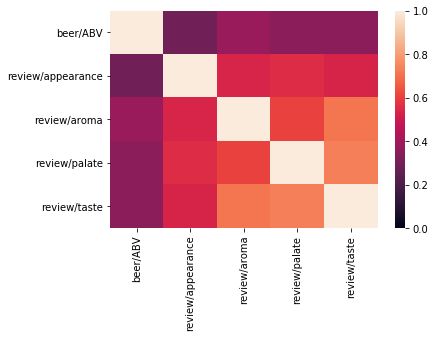

In [14]:
import seaborn as sns
#Correlation Plot
corr = predictorsNumerical.corr()
heatmap = sns.heatmap(corr, vmin=0, vmax=1)

In [15]:
#Dropping review/taste due to multi-collinearity, correlation more than 0.6 with two variables
predictorsNumerical = predictorsNumerical.drop(['review/taste'],axis=1)

# Feature Transformation - Dummies

In [16]:
predictors = pd.concat([predictorsCategorical.reset_index(drop=True),predictorsNumerical.reset_index(drop=True)],axis=1)

from sklearn.preprocessing import LabelEncoder

# One hot encoding Categorical Variables
predictorsCategorical_encoded  = pd.get_dummies(predictorsCategorical)

X = pd.concat([predictorsCategorical_encoded.reset_index(drop=True),predictorsNumerical.reset_index(drop=True)],axis=1)
X.shape

(37490, 1790)

# Feature Selection - p-values

From the 1790 independent variables created, choosing only those for prediction with p-values < 0.05, by running ordinary least squares regression

In [17]:
X2 = sm.add_constant(X)
results = sm.OLS(target,X2).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         review/overall   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     31.74
Date:                Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:00:26   Log-Likelihood:                -22600.
No. Observations:               37490   AIC:                         4.861e+04
Df Residuals:                   35787   BIC:                         6.314e+04
Df Model:                        1702                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [18]:
cols = ['beer/name_5 Day IPA','beer/name_Adam & Eve Ale','beer/name_Agitator Double IPA','beer/name_Amstel Bright',
        'beer/name_Amstel Lager','beer/name_Amstel Light','beer/name_Antebellum Ale','beer/name_Balashi','beer/name_Baro Tradicinis',
        'beer/name_Barrel Aged Frosted Frog Christmas Ale','beer/name_Batemans Marie Celeste','beer/name_Bavarian Hefe-Weizen',
        'beer/name_Bearded Pats Barleywine','beer/name_Bernard S &#269;istou Hlavou','beer/name_Big Mother Strong Scottish Ale','beer/name_Black Heart Lager','beer/name_Black Rock ESB','beer/name_Browns Point ESB',
        'beer/name_CBC E.S.B. "dank Nugs"','beer/name_Caldera Ginger Beer','beer/name_Camino Real Common','beer/name_Copper Ale',
        'beer/name_CucapÃ¡ Tequila Barrel Aged Ale','beer/name_Divers Porter','beer/name_Double Six','beer/name_Elora Grand Lager',
        'beer/name_Farmhouse Ale','beer/name_Final Countdown','beer/name_Founders Bangin Berry Cream','beer/name_Founders Black Sunshine',
        'beer/name_Founders Cerise','beer/name_Founders Curmudgeon (Old Ale)','beer/name_Founders Double Dirty',
        'beer/name_Founders El Diablo Del Noche','beer/name_Founders Gold Sunshine','beer/name_Founders HolÃ© MolÃ©',
        'beer/name_Founders Homegrown Spite (Mild)','beer/name_Founders MPG IPA (Nitro)','beer/name_Founders Noble Lager',
        'beer/name_Founders Solid Gold Extra Pale Ale','beer/name_Founders Spice Rack Attack','beer/name_Founders Summer Braggot',
        'beer/name_Founders Yukon Cornelious Spiced Ale','beer/name_Frosted Frog Christmas Ale','beer/name_Gambrinus','beer/name_Gambrinus Pale',
        'beer/name_Gem','beer/name_Goats Breath Bock','beer/name_Great Dane Pale Ale','beer/name_Grey Whale Ale','beer/name_Grumpys Original Draught',
        'beer/name_Harboe BjÃ¸rnebryg Extra Stark (Bear Beer Extra Strong)','beer/name_Harboe GuldÃ¸l (Harboe Beer Gold)','beer/name_Harboe Red Beer',
        'beer/name_Helles Honey Bock','beer/name_IPA','beer/name_Javaspresso Nitro Stout','beer/name_JuleÃ¸l',
        'beer/name_Kiper Bock','beer/name_Kiper Lager','beer/name_La Binchoise Rose Des Remparts','beer/name_La Binchoise Triple',
        'beer/name_Lawnmower Lager','beer/name_Le Rock 66','beer/name_Luna De Miel: Raspberry Meade',
        'beer/name_Mathias III','beer/name_Mean Manalishi Double I.P.A.','beer/name_Midnight Hour Robust Porter',
        'beer/name_Midnight Lager','beer/name_Moon Dance Pale Ale','beer/name_Mornington Peninsula IPA','beer/name_OScura',
        'beer/name_O.K. Beer','beer/name_Ohio Pumpkin Ale','beer/name_Okocim Premium Pils','beer/name_Oktoberfest','beer/name_Old Brick Irish Amber Ale',
        'beer/name_One Hop Wonder #9 - Columbus','beer/name_Otro Mundo Nut Brown Ale','beer/name_Pike Kilt Lifter Scotch Style Ale',
        'beer/name_Pilsner Urquell 3.5%','beer/name_Quinns Marathon Mild','beer/name_Raudonyu Dobilu Alus','beer/name_Rye 75',
        'beer/name_Sakara King','beer/name_Scotch Ale','beer/name_Sgt. Pepper','beer/name_Sheltowee GloomSucker Black Ale',
        'beer/name_Six Point Star Golden American Lager','beer/name_SkÃ¦lskÃ¸r Original Black','beer/name_Spezial Doppel-Doppel Bock',
        'beer/name_Station Masters Tipple','beer/name_Stella','beer/name_Stoudts Gold Lager','beer/name_Suicide By Hops',
        'beer/name_Taps Red Cream Ale','beer/name_Trafalgar Bock Lager','beer/name_Trafalgar Maple Bock','beer/name_Tripel Threat',
        'beer/name_Turbo Shandy','beer/name_Unfiltered Wheat','beer/name_Valiant','beer/name_Verich Gold','beer/name_Viven Ale',
        'beer/name_Wheach','beer/name_Wilkenburger Black','beer/name_Winter Flurry','beer/name_Winter Warmer',
        'beer/name_Winters Street Strawberry Ale','beer/name_Wobbly Bob APA','beer/style_American Porter',
        'beer/style_Braggot','beer/style_California Common / Steam Beer','beer/style_Dortmunder / Export Lager',
        'beer/style_Fruit / Vegetable Beer','beer/style_Keller Bier / Zwickel Bier','beer/style_Rye Beer','review/appearance',
        'review/aroma','review/palate'
]
X_significant=X[cols]
X_significant

,beer/name_5 Day IPA,beer/name_Adam & Eve Ale,beer/name_Agitator Double IPA,beer/name_Amstel Bright,beer/name_Amstel Lager,beer/name_Amstel Light,beer/name_Antebellum Ale,beer/name_Balashi,beer/name_Baro Tradicinis,beer/name_Barrel Aged Frosted Frog Christmas Ale,...,beer/style_American Porter,beer/style_Braggot,beer/style_California Common / Steam Beer,beer/style_Dortmunder / Export Lager,beer/style_Fruit / Vegetable Beer,beer/style_Keller Bier / Zwickel Bier,beer/style_Rye Beer,review/appearance,review/aroma,review/palate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,4.0,4.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,3.5,3.5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.5,4.0,3.5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.0,3.0,3.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,3.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4.0,3.5,3.5
37486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.5,4.0,4.5
37487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,3.5,4.5
37488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,4.0,5.0


In [19]:
# Splitting
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X_significant,target,train_size=0.8,test_size=0.2,random_state=0)

# MODELLING

In [20]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

model = DecisionTreeRegressor(criterion='mse',min_samples_leaf=10,max_depth=20)
model.fit(train_X, train_y)
predicted = model.predict(val_X)

Performing feature selection again based on variable importance plot of random forest. Choosing only 14 variables for the final model

In [21]:
#Variable Importance Plot
features=X.columns
importances = model.feature_importances_
importances

array([2.92861183e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.96185584e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.48225694e-04, 1.31948272e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [22]:
cols = ['beer/name_5 Day IPA', 'beer/name_Amstel Light', 'beer/name_Founders Cerise','beer/name_Founders Curmudgeon (Old Ale)',
'beer/name_Mean Manalishi Double I.P.A.', 'beer/name_O.K. Beer', 'beer/name_Pike Kilt Lifter Scotch Style Ale',
'beer/name_Stoudts Gold Lager','beer/style_American Porter','beer/style_Fruit / Vegetable Beer','beer/style_Rye Beer',
'review/appearance','review/aroma','review/palate']
X_final = X_significant[cols]

In [23]:
# Final model building
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X,target,train_size=0.8,test_size=0.2,random_state=0)

model = DecisionTreeRegressor(criterion='mse',min_samples_leaf=10,max_depth=20)
model.fit(train_X, train_y)
predicted = model.predict(val_X)

# MODEL VALIDATION

# Mean Squared Error

In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(val_y,predicted)
mse

0.23150623712471158

# Mean Absolute Percentage Error

In [25]:
def mape(true, pred):
    true = np.array(true)
    pred = np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

mape_test = mape(val_y,predicted)
mape_test

10.813621828892547

# MODELLING WITH CATBOOST

In [26]:
X = pd.concat([predictorsCategorical.reset_index(drop=True),predictorsNumerical.reset_index(drop=True)],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37490 entries, 0 to 37489
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beer/name          37490 non-null  object 
 1   beer/style         37490 non-null  object 
 2   sentiment          37490 non-null  object 
 3   beer/ABV           37490 non-null  float64
 4   review/appearance  37490 non-null  float64
 5   review/aroma       37490 non-null  float64
 6   review/palate      37490 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.0+ MB


In [27]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 0)

categorical_var = np.where(x_train.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [0 1 2]


In [28]:
cat_model = CatBoostClassifier(iterations=100,learning_rate=0.5)
cat_model.fit(x_train,y_train,cat_features=categorical_var, plot=False)

cat_pred = cat_model.predict(x_test)

0:	learn: 1.6098220	total: 1.27s	remaining: 2m 5s
1:	learn: 1.4609294	total: 1.88s	remaining: 1m 32s
2:	learn: 1.3810933	total: 2.45s	remaining: 1m 19s
3:	learn: 1.3283384	total: 3s	remaining: 1m 12s
4:	learn: 1.3053253	total: 3.53s	remaining: 1m 7s
5:	learn: 1.2893762	total: 4.11s	remaining: 1m 4s
6:	learn: 1.2793844	total: 4.68s	remaining: 1m 2s
7:	learn: 1.2726853	total: 5.24s	remaining: 1m
8:	learn: 1.2692088	total: 5.79s	remaining: 58.5s
9:	learn: 1.2612541	total: 6.34s	remaining: 57s
10:	learn: 1.2558464	total: 7.01s	remaining: 56.7s
11:	learn: 1.2534845	total: 8.44s	remaining: 1m 1s
12:	learn: 1.2494710	total: 9.85s	remaining: 1m 5s
13:	learn: 1.2477013	total: 10.4s	remaining: 1m 3s
14:	learn: 1.2457359	total: 10.9s	remaining: 1m 1s
15:	learn: 1.2440612	total: 11.5s	remaining: 1m
16:	learn: 1.2408359	total: 12s	remaining: 58.5s
17:	learn: 1.2389611	total: 12.5s	remaining: 57.1s
18:	learn: 1.2338517	total: 13.6s	remaining: 58.1s
19:	learn: 1.2331550	total: 15.2s	remaining: 1m
20:

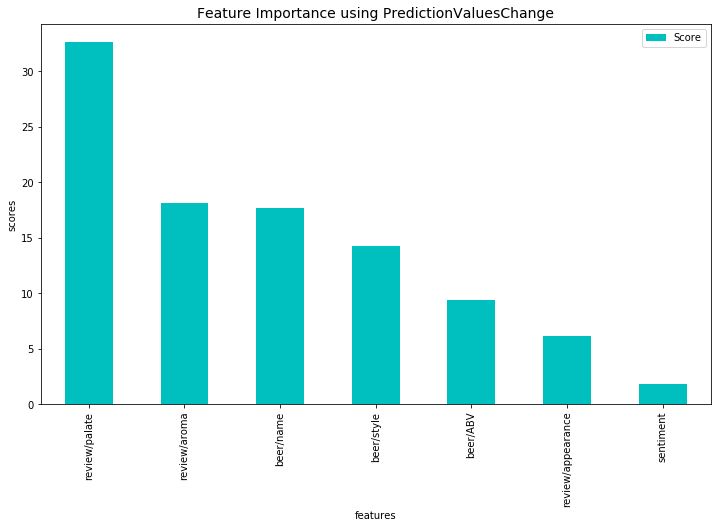

In [29]:
#Feature importance with CatBoost
from catboost import Pool
def get_feature_imp_plot(method):
    
    if method == "Permutation":
        fi =  permutation_importances(cat_model, x_test, y_test, log_loss)
    
    elif method == "Baseline":
        fi = baseline_importance(cat_model, x_train, y_train, x_test, y_test, log_loss)
    
    elif method == "ShapeValues":
        shap_values = cat_model.get_feature_importance(Pool(x_test, label=y_test,cat_features=categorical_var), 
                                                                     type="ShapValues")
        shap_values = shap_values[:,:-1]
        shap.summary_plot(shap_values, x_test) 
        
    else:
        fi = cat_model.get_feature_importance(Pool(x_test, label=y_test,cat_features=categorical_var), 
                                                                     type=method)
        
    if method != "ShapeValues":
        feature_score = pd.DataFrame(list(zip(x_test.dtypes.index, fi )),
                                        columns=['Feature','Score'])

        feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

        plt.rcParams["figure.figsize"] = (12,7)
        ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
        ax.set_title("Feature Importance using {}".format(method), fontsize = 14)
        ax.set_xlabel("features")
        ax.set_ylabel("scores")
        plt.show()

get_feature_imp_plot(method="PredictionValuesChange")

In [30]:
#MAPE for catboost based on all predictors
def mape(true, pred):
    true = np.array(true)
    pred = np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

mape_test = mape(y_test,cat_pred)
mape_test

21.173041640379168

Choosing 4 variables based on variable importance plot and applying catboost model again

In [31]:
cols = ['review/palate','review/aroma','beer/name','beer/style']
X_final = X[cols]

x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 0)

categorical_var = np.where(x_train.dtypes != np.float)[0]

cat_model = CatBoostClassifier(iterations=100,learning_rate=0.5)
cat_model.fit(x_train,y_train,cat_features=categorical_var, plot=False)

cat_pred = cat_model.predict(x_test)

0:	learn: 1.6098220	total: 514ms	remaining: 50.9s
1:	learn: 1.4609294	total: 1.09s	remaining: 53.3s
2:	learn: 1.3810933	total: 1.67s	remaining: 53.8s
3:	learn: 1.3283384	total: 2.27s	remaining: 54.6s
4:	learn: 1.3053253	total: 2.84s	remaining: 54s
5:	learn: 1.2893762	total: 3.42s	remaining: 53.6s
6:	learn: 1.2793844	total: 4s	remaining: 53.1s
7:	learn: 1.2726853	total: 4.57s	remaining: 52.6s
8:	learn: 1.2692088	total: 6.07s	remaining: 1m 1s
9:	learn: 1.2612541	total: 7.36s	remaining: 1m 6s
10:	learn: 1.2558464	total: 7.94s	remaining: 1m 4s
11:	learn: 1.2534845	total: 8.5s	remaining: 1m 2s
12:	learn: 1.2494710	total: 9.1s	remaining: 1m
13:	learn: 1.2477013	total: 9.69s	remaining: 59.5s
14:	learn: 1.2457359	total: 10.3s	remaining: 58.1s
15:	learn: 1.2440612	total: 11.3s	remaining: 59.3s
16:	learn: 1.2408359	total: 12.9s	remaining: 1m 3s
17:	learn: 1.2389611	total: 13.7s	remaining: 1m 2s
18:	learn: 1.2338517	total: 14.4s	remaining: 1m 1s
19:	learn: 1.2331550	total: 14.9s	remaining: 59.5s


In [32]:
#MAPE for catboost based on 4 predictors
def mape(true, pred):
    true = np.array(true)
    pred = np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

mape_test = mape(y_test,cat_pred)
mape_test

21.173041640379168

In [33]:
#MSE for catboost
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,cat_pred)
mse

0.25166711122966123

# On the basis of MAPE values, we can say that decision tree is a better model with 14 dummy coded features than catboost